In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import numpy as np
import math

df=pd.read_csv("Palakkad_multi_data.csv")

In [3]:
df

,Unnamed: 0,INDEX,YEAR,MN,DT,..MAX,..MIN,AW,..R/F
0,NaN,43335,1970,1,1,30.8,23.8,13,0.0
1,NaN,43335,1970,1,2,30.6,22.2,13,3.2
2,NaN,43335,1970,1,3,31.4,21.4,12,0.0
3,NaN,43335,1970,1,4,31.4,21.6,11,0.0
4,NaN,43335,1970,1,5,32.2,19.8,6,0.0
...,...,...,...,...,...,...,...,...,...
13510,NaN,43335,2018,4,27,37.2,25.2,4,2.1
13511,NaN,43335,2018,4,28,37.3,26.9,3,0.0
13512,NaN,43335,2018,4,29,39.0,26.3,4,0.0
13513,NaN,43335,2018,4,30,37.9,26.8,4,0.0


<AxesSubplot:>

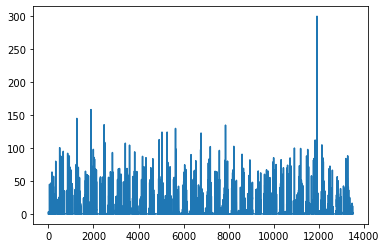

In [4]:
df['..R/F'].plot()

In [5]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop(['AW'],axis=1)

<AxesSubplot:>

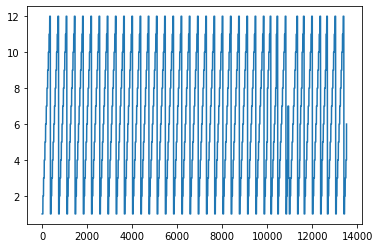

In [6]:
df['MN'].plot(x = 'YEAR')

<AxesSubplot:xlabel='YEAR'>

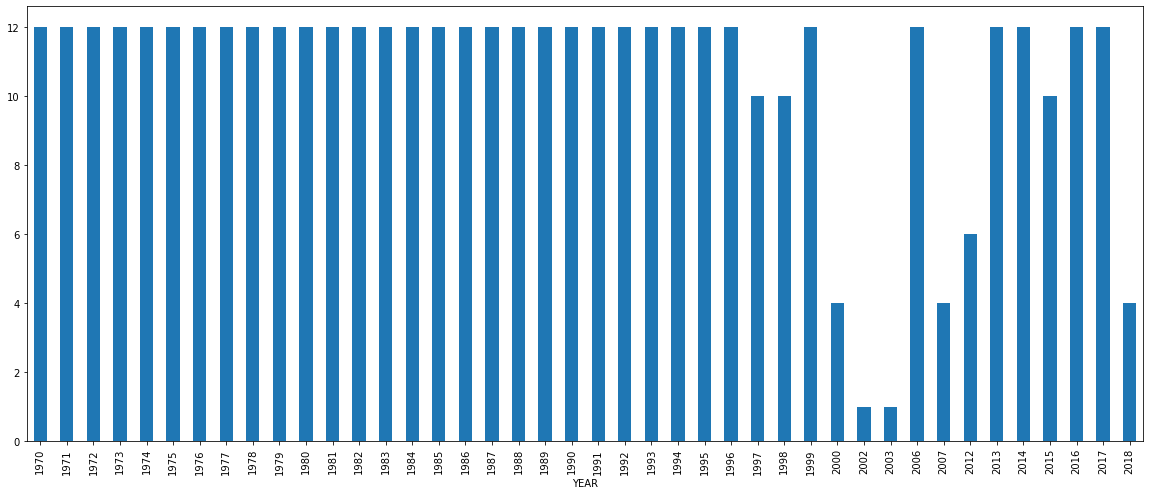

In [7]:
df.groupby('YEAR')['MN'].nunique().plot(kind='bar',figsize=(20,8))

<AxesSubplot:xlabel='MN'>

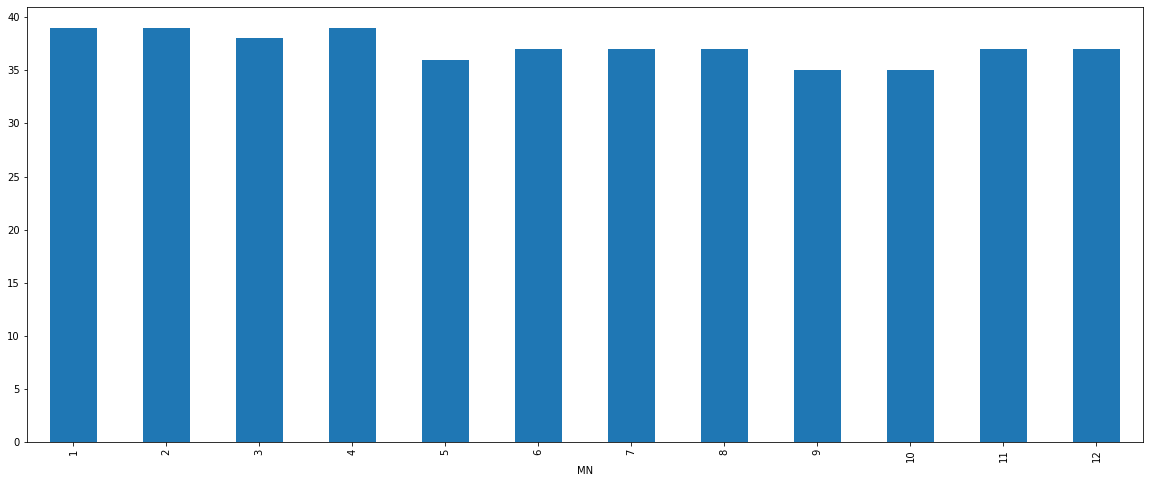

In [8]:
df.groupby('MN')['YEAR'].nunique().plot(kind='bar',figsize=(20,8))

In [9]:
df2 = df.head(9849)

In [10]:
df2

,INDEX,YEAR,MN,DT,..MAX,..MIN,..R/F
0,43335,1970,1,1,30.8,23.8,0.0
1,43335,1970,1,2,30.6,22.2,3.2
2,43335,1970,1,3,31.4,21.4,0.0
3,43335,1970,1,4,31.4,21.6,0.0
4,43335,1970,1,5,32.2,19.8,0.0
...,...,...,...,...,...,...,...
9844,43335,1996,12,27,30.8,20.4,0.0
9845,43335,1996,12,28,30.0,22.6,0.0
9846,43335,1996,12,29,29.6,22.2,0.0
9847,43335,1996,12,30,29.2,21.8,0.0


In [16]:
df2 = df2.ffill(axis = 0) 

In [19]:
df2['..MAX'].isna().sum()

0

<AxesSubplot:xlabel='YEAR'>

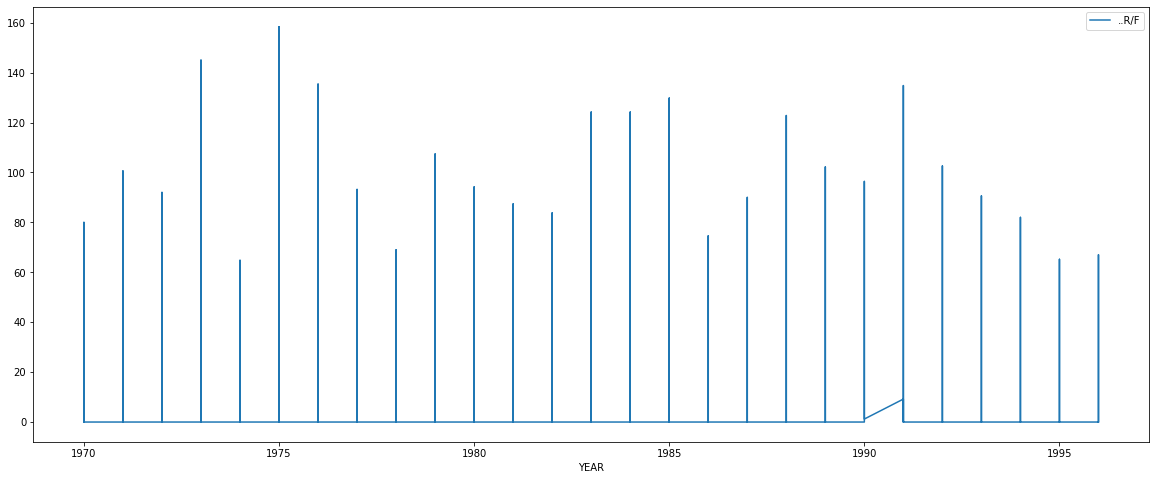

In [20]:
df2.plot(y = '..R/F',x = 'YEAR',figsize=(20,8))

In [21]:
df2['..R/F']

0       0.0
1       3.2
2       0.0
3       0.0
4       0.0
       ... 
9844    0.0
9845    0.0
9846    0.0
9847    0.0
9848    0.0
Name: ..R/F, Length: 9849, dtype: float64

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 30, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

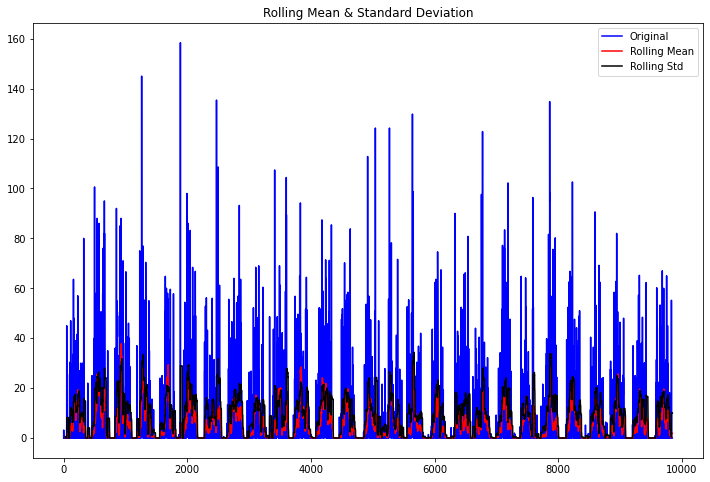

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.552662e+01
p-value                        2.247933e-28
#Lags Used                     1.700000e+01
Number of Observations Used    9.831000e+03
Critical Value (1%)           -3.431015e+00
Critical Value (5%)           -2.861834e+00
Critical Value (10%)          -2.566927e+00
dtype: float64


In [23]:
test_stationarity(df2['..R/F'])

<Figure size 432x288 with 0 Axes>

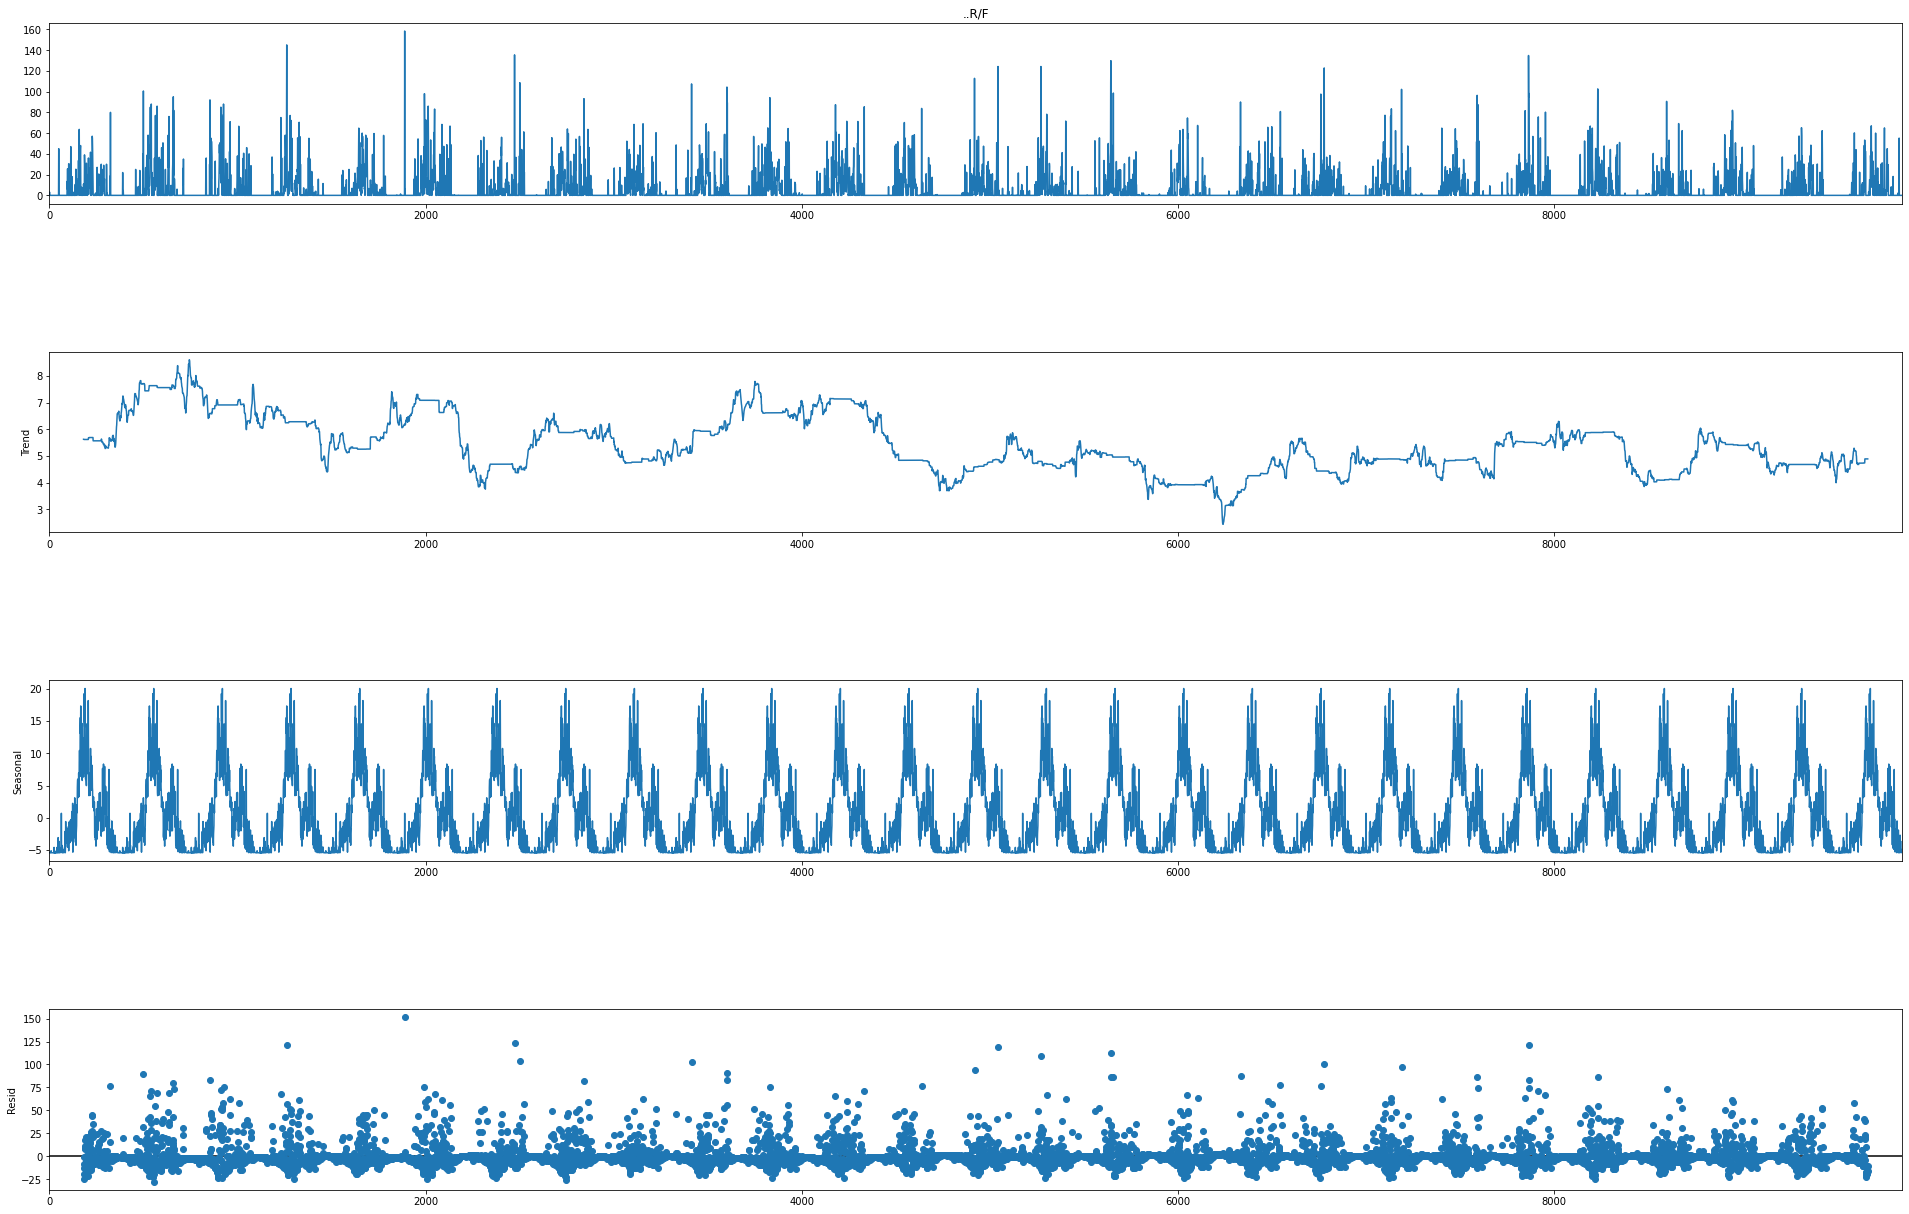

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['..R/F'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(30, 20)

In [29]:
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

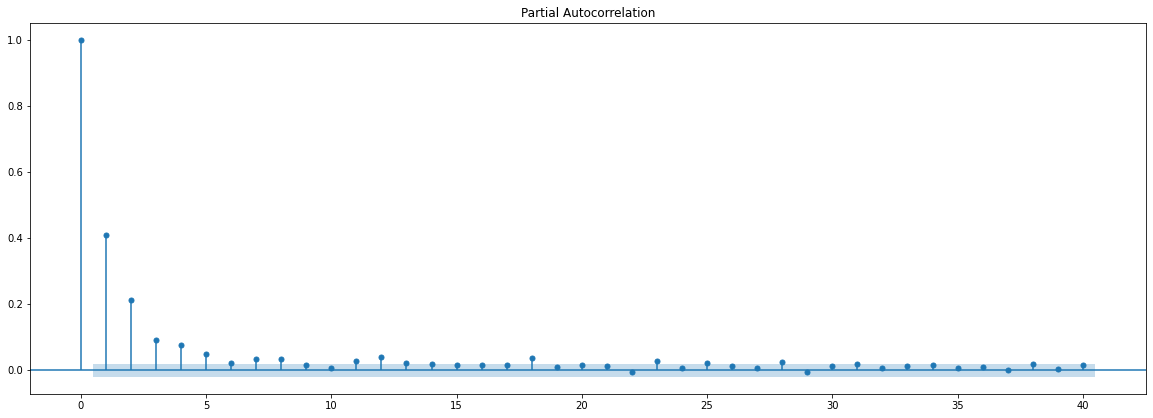

In [32]:
fig = plt.figure(figsize=(20,15))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['..R/F'], lags=40, ax=ax2)

In [34]:
model2 = sm.tsa.ARIMA(df2['..R/F'], order=(10, 0, 0)).fit(disp = 1)

In [35]:
fitted = model2.fittedvalues

In [38]:
forecast = model2.forecast(steps=95)[0]

In [43]:
dat = []
import datetime
start = datetime.datetime(1970, 1, 1)
end = datetime.datetime(1996, 12, 31)

delta = end - start

for i in range(delta.days + 1):
    dat.append(start + datetime.timedelta(days=i))

In [45]:
len(dat)

9862

ValueError: x and y must have same first dimension, but have shapes (9849,) and (9862,)

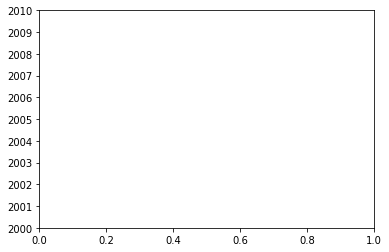

In [46]:
import matplotlib.pyplot as plt
plt.plot(df2['..R/F'] , dat ,'r')
plt.plot(fitted , dat,'b')
plt.plot(forecast, dat, 'g')
plt.show()